In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
df["Fare"].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


In [ ]:
df["Embarked"].value_counts()/df.shape[0]*100

,count
Embarked,
S,72.278339
C,18.855219
Q,8.641975


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**UNIVARIATE ANALYSIS**

**Categorical Data → Bar Plot, Pie Chart, Count Plot.
Numerical Data → Histogram, Box Plot, KDE, Violin Plot.
If you want to focus on distribution → Histogram or KDE.
If you care about outliers or range → Box Plot or Violin Plot.
If you care about proportions → Pie Chart.
If you want trends over time → Line Plot.**

In [ ]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df['Survived'].value_counts()/df.shape[0]*100

,count
Survived,
0,61.616162
1,38.383838


**countplot**

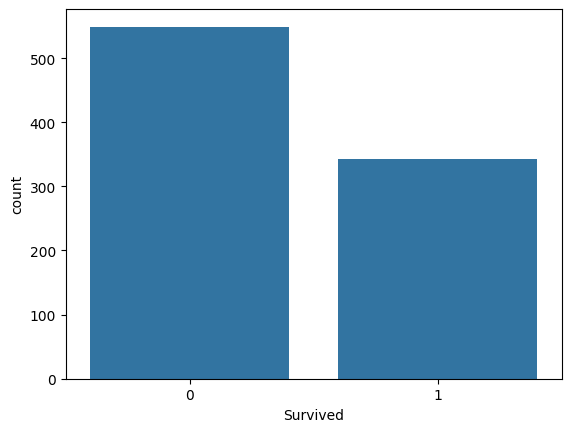

In [ ]:
sns.countplot(x=df["Survived"])
plt.show()

**countplot without using seaborn**

<Axes: xlabel='Sex'>

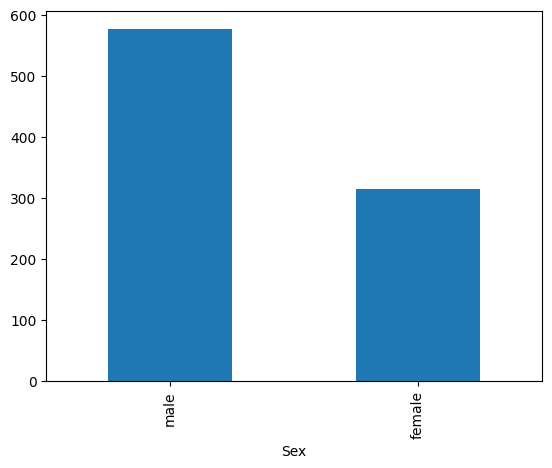

In [ ]:
df["Sex"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

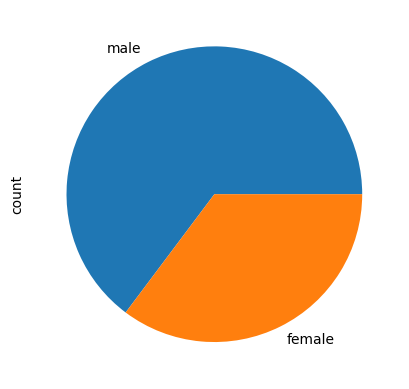

In [ ]:
df["Sex"].value_counts().plot(kind="pie")

**univariate analysis for numeric data**

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


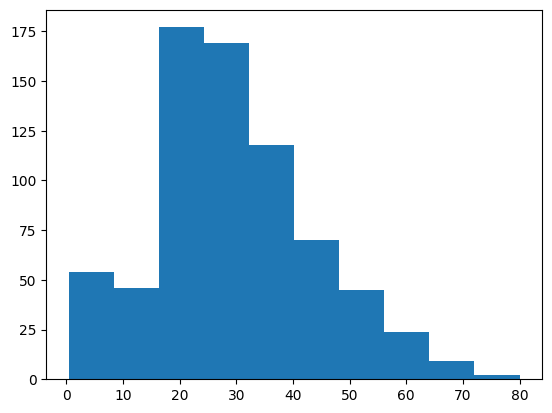

In [ ]:
plt.hist(df["Age"])
plt.show()

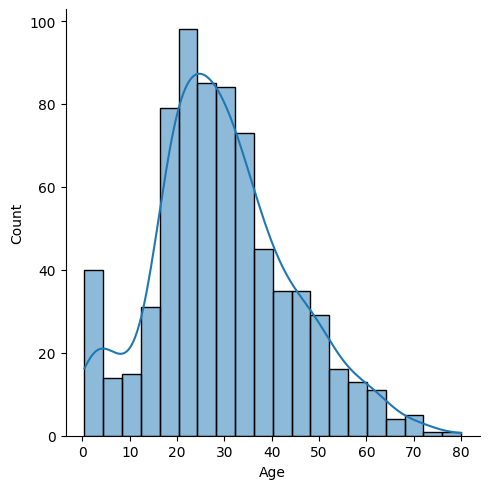

In [ ]:
sns.displot(df["Age"],kde=True)
plt.show()

In [ ]:
df["Age"].skew()

0.38910778230082704

In [ ]:
df["Age"].min()

0.42

In [ ]:
df["Age"].max()

80.0

<Axes: ylabel='Age'>

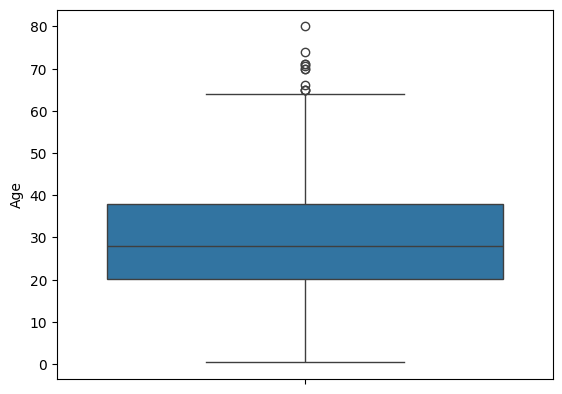

In [ ]:
sns.boxplot(df["Age"])

In [ ]:
df["Fare"].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


<Axes: ylabel='Fare'>

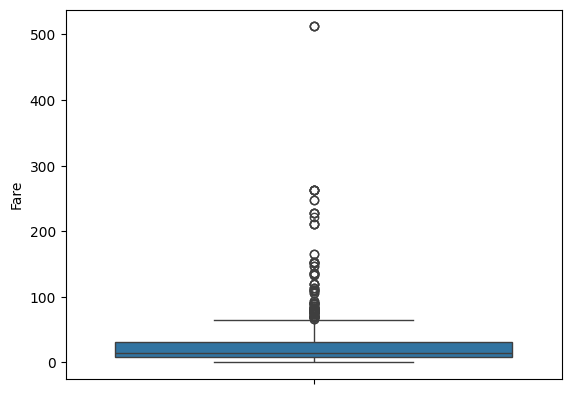

In [ ]:
sns.boxplot(df["Fare"])

**bivariate/multivariate analysis analysis**

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


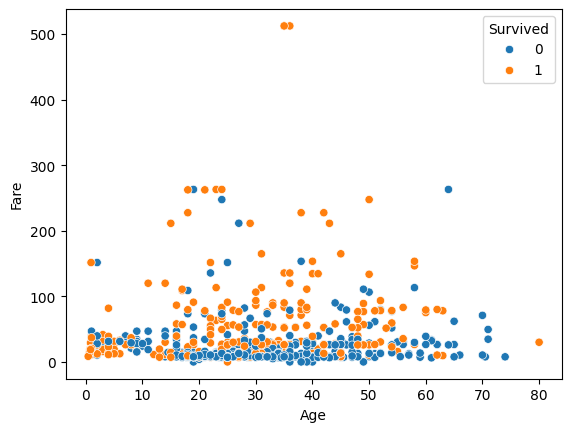

In [ ]:
sns.scatterplot(data=df,x="Age",y="Fare",hue=df["Survived"])
plt.show()

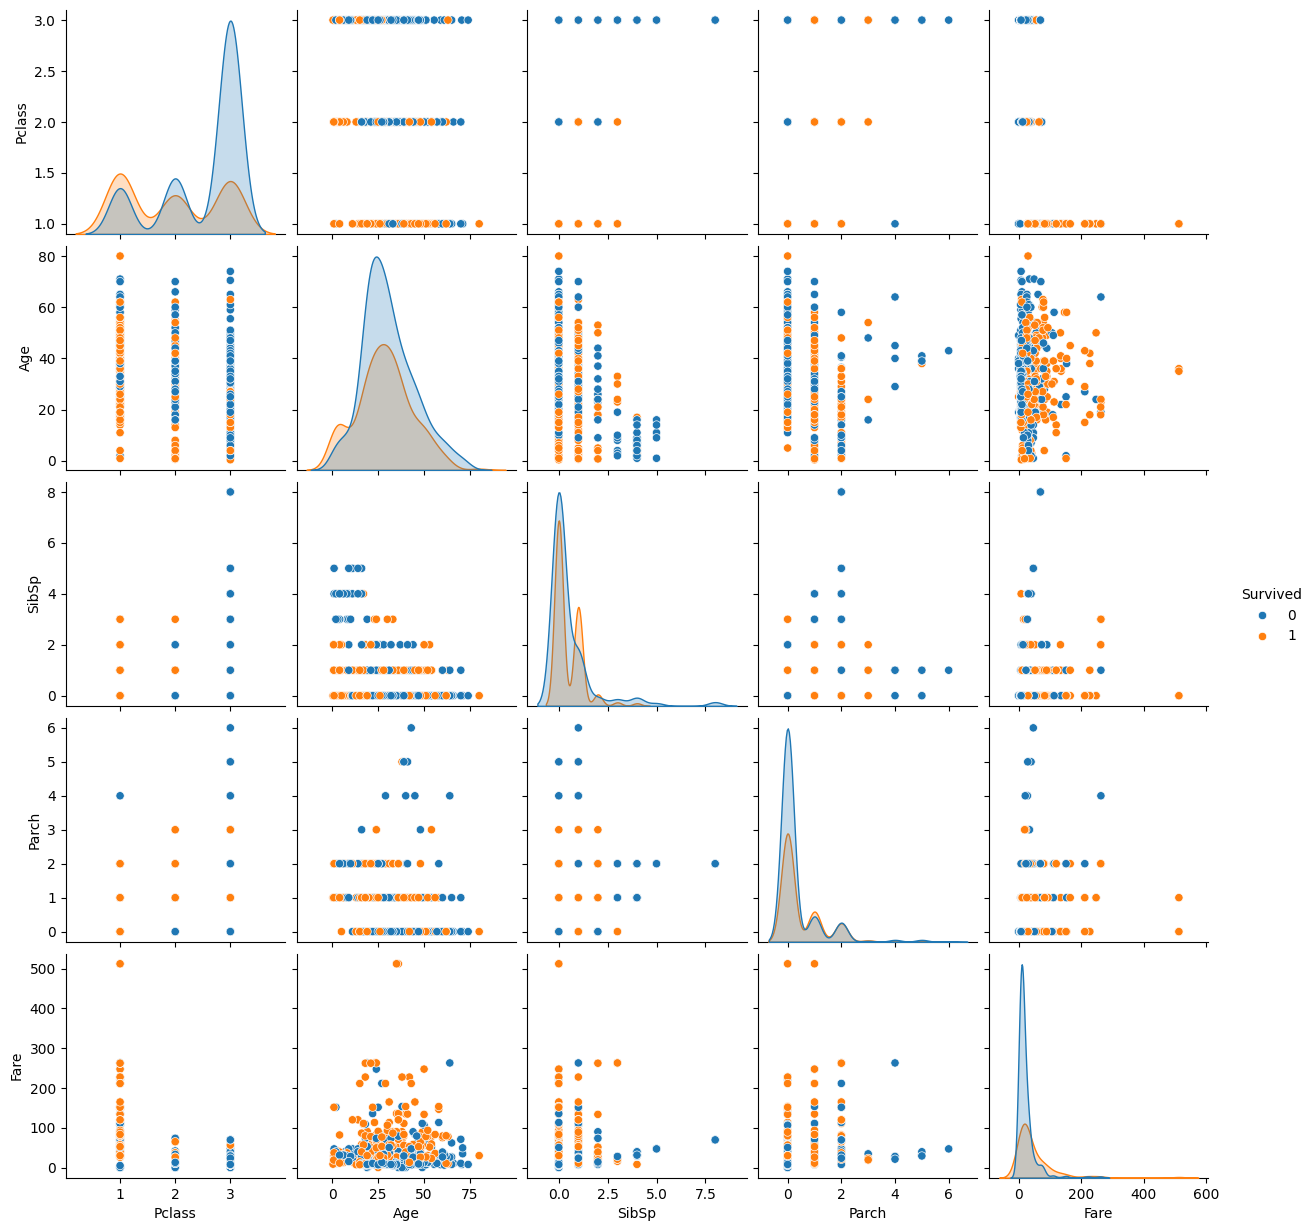

In [ ]:
sns.pairplot(df,hue="Survived")
plt.show()

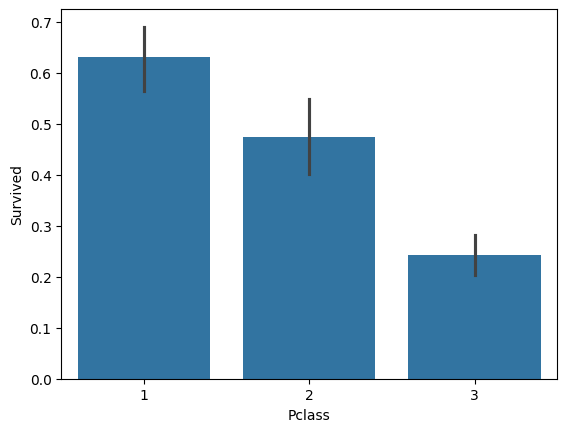

In [ ]:
sns.barplot(data=df,x="Pclass",y="Survived")
plt.show()

In [ ]:
survival_rate=df.groupby("Pclass")["Survived"].mean()*100
print(survival_rate)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


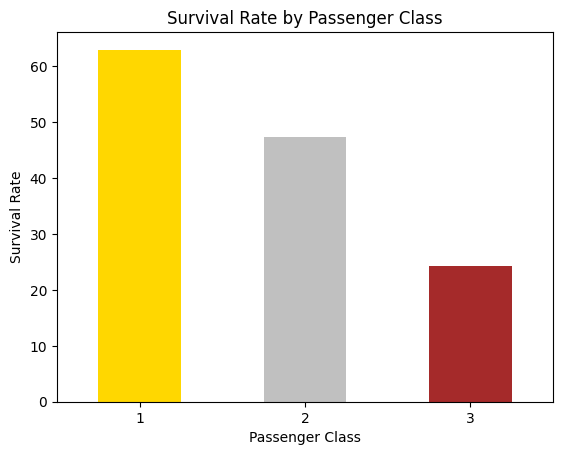

In [ ]:


survival_rate.plot(kind="bar", color=["gold", "silver", "brown"])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()


In [ ]:
survival_rate_sex=df.groupby("Sex")["Survived"].mean()*100
print(survival_rate_sex)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


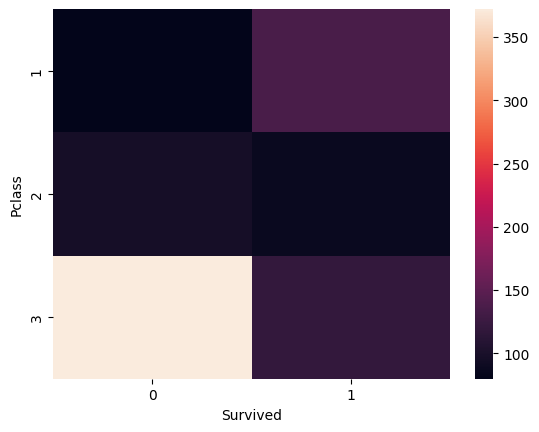

In [ ]:
sns.heatmap(pd.crosstab(df["Pclass"],df["Survived"]))
plt.show()

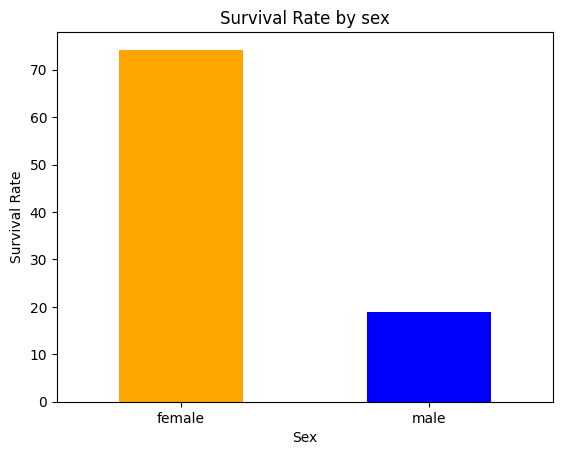

In [ ]:
survival_rate_sex.plot(kind="bar", color=["orange", "blue"])
plt.title("Survival Rate by sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

In [ ]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


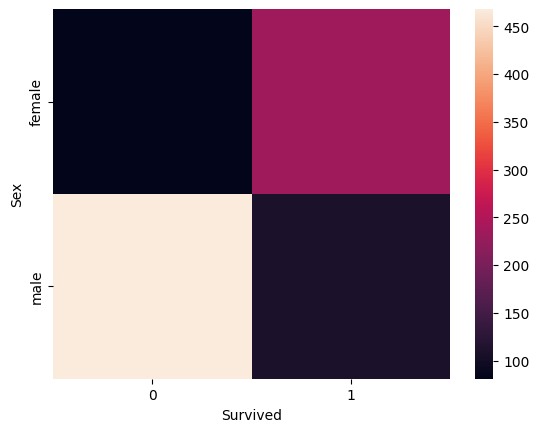

In [ ]:
sns.heatmap(pd.crosstab(df["Sex"],df["Survived"]))
plt.show()